

#Load libraries

In [15]:
#Set up google colab working environment
!pwd
!git clone https://github.com/zrosen3/Colombian-peso-counterfeit-detection.git
%cd /content/Colombian-peso-counterfeit-detection/Code
!pwd


/content/Colombian-peso-counterfeit-detection/Code
Cloning into 'Colombian-peso-counterfeit-detection'...
remote: Enumerating objects: 21050, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 21050 (delta 43), reused 46 (delta 16), pack-reused 20965
Receiving objects: 100% (21050/21050), 439.89 MiB | 24.88 MiB/s, done.
Resolving deltas: 100% (137/137), done.
Updating files: 100% (62414/62414), done.
/content/Colombian-peso-counterfeit-detection/Code
/content/Colombian-peso-counterfeit-detection/Code


In [16]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import cv2
from PIL import Image
import seaborn as sns
from common_functions import LoadData, PeakData, MakeModel, ExtractLabels, ConfusionMatrix, EvaluateModel 


#Load in data

In [17]:
train_ds, test_ds, validation_ds, class_names =  LoadData()


Found 12479 files belonging to 13 classes.
Found 4160 files belonging to 13 classes.
Found 4160 files belonging to 13 classes.


## Run logistic regression model

In [18]:
#initialize model
tf.keras.backend.clear_session()
np.random.seed(0)
tf.random.set_seed(0)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(480, 640, 3)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(
        units = 13,
        activation = "softmax"
)])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)



In [19]:
history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=6
)

Epoch 1/6
390/390 [==============================] - 227s 567ms/step - loss: 31.6570 - accuracy: 0.5250 - val_loss: 28.0872 - val_accuracy: 0.6675
Epoch 2/6
390/390 [==============================] - 212s 542ms/step - loss: 11.8240 - accuracy: 0.7495 - val_loss: 15.3971 - val_accuracy: 0.7423
Epoch 3/6
390/390 [==============================] - 200s 513ms/step - loss: 8.9183 - accuracy: 0.8153 - val_loss: 4.4288 - val_accuracy: 0.8060
Epoch 4/6
390/390 [==============================] - 188s 480ms/step - loss: 7.4446 - accuracy: 0.8407 - val_loss: 11.7477 - val_accuracy: 0.7493
Epoch 5/6
390/390 [==============================] - 174s 445ms/step - loss: 5.8878 - accuracy: 0.8751 - val_loss: 1.4467 - val_accuracy: 0.9490
Epoch 6/6
390/390 [==============================] - 188s 480ms/step - loss: 5.3865 - accuracy: 0.8961 - val_loss: 2.6151 - val_accuracy: 0.8861


Evaluate model

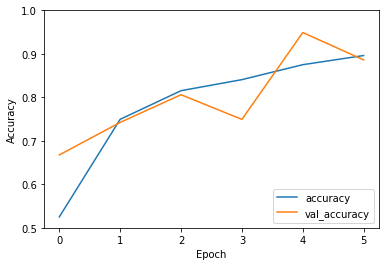

130/130 - 24s - loss: 2.4405 - accuracy: 0.8918 - 24s/epoch - 186ms/step
Test loss: 2.440476417541504 | Test accuracy: 0.8918269276618958


In [20]:
EvaluateModel(model, test_ds, history)
